In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

URL = 'https://www.worldometers.info/coronavirus/'
html_content  = requests.get(URL).text

In [2]:
soup = bs(html_content, "lxml")
#print(soup.prettify()) # print the parsed data of html

In [3]:
print(soup.title.text)

Coronavirus Update (Live): 97,309,892 Cases and 2,083,326 Deaths from COVID-19 Virus Pandemic - Worldometer


In [4]:
data=[]
table = soup.find("table", attrs={"id": "main_table_countries_today"})
table_body = table.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols) 
df = pd.DataFrame(data)
df = df.drop(df.index[0:7]) # remove extra rows

# # Get all the headings of Lists
headings = []
for th in table.find_all("th"):
    headings.append(th.get_text())

#headings.pop(0)
headings = pd.DataFrame(headings).transpose()

#headings = pd.DataFrame(table.find_all('tr')[0].get_text().split('\n')).transpose()
df= pd.concat([headings, df])

In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.reset_index(drop=True)
df = df.drop(['#','1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl'], axis=1)
df = df.rename(columns={'Country,Other':'Country'})

In [6]:
df['TotalDeaths'] = df['TotalDeaths'].str.replace(',', '')
df['TotalCases'] = df['TotalCases'].str.replace(',', '')
df[['TotalDeaths','TotalCases']] = df[['TotalDeaths','TotalCases']].apply(pd.to_numeric)
df['ratio'] = (df.TotalDeaths/df.TotalCases)*100
df.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,ratio
0,World,97309892,"+28,290",2083326.0,"+1,666","69,851,616","+18,830","25,374,950","112,255","12,484",267.3,,,,All,2.140919
1,USA,24998975,,415894.0,,"14,968,716",,"9,614,365","28,198","75,279","1,252","291,570,529","878,007","332,082,117",North America,1.663644
2,India,10611719,,152906.0,,"10,265,706",+543,"193,107","8,944","7,648",110,"189,347,782","136,464","1,387,530,727",Asia,1.440916
3,Brazil,8639868,,212893.0,,"7,564,622",,"862,353","8,318","40,487",998,"28,600,000","134,021","213,399,066",South America,2.464077
4,Russia,3633952,,67220.0,,"3,027,316",,"539,416","2,300","24,895",461,"97,600,000","668,633","145,969,379",Europe,1.849777
5,UK,3505754,,93290.0,,"1,571,519",,"1,840,945","3,947","51,491","1,370","65,875,546","967,557","68,084,411",Europe,2.661054
6,France,2965117,,71652.0,,"213,242",,"2,680,223","2,852","45,370","1,096","40,484,097","619,458","65,354,019",Europe,2.416498
7,Italy,2414166,,83681.0,,"1,806,932",,"523,553","2,461","39,962","1,385","29,899,198","494,920","60,412,161",Europe,3.466249
8,Spain,2412318,,54637.0,,N/A,N/A,N/A,"3,583","51,584","1,168","30,165,217","645,040","46,764,883",Europe,2.264917
9,Turkey,2406216,,24487.0,,"2,283,919",,"97,810","2,102","28,361",289,"27,867,450","328,462","84,842,191",Asia,1.017656


In [7]:
df = df.sort_values('TotalDeaths', ascending=False)

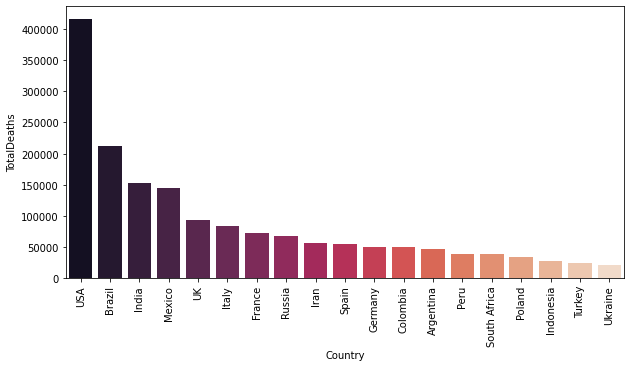

In [8]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Country', y ='TotalDeaths', data=df[1:20], palette='rocket')
plt.xticks(rotation=90);